# Group Project: Discussion of Risk Factors of Heart Disease 

Heart disease describes various conditions that affect the heart, but this data set is specific to coronary artery disease (CAD). CAD is characterized by impaired blood flow to the heart due to plaque build-up, consisting mostly of cholesterol, within the inner walls of the arteries. The blockage from this plaque inhibits the heart from receiving adequate levels of oxygenated blood. This can cause symptoms such as chest pains and shortness of breath. In severe cases, heart attacks can transpire if the complete blockage of blood flow to the heart occurs (Coronary artery disease, 2022). Since the plaque causing the blockage is mostly cholesterol, our question is “Can we infer the presence of coronary artery disease based on the levels of cholesterol levels and resting systolic blood pressure, and whether there is a similar relationship present in both males or females?”.
We are using a heart disease dataset found in UC Irvine’s online Machine Learning Repository. The data was gathered from “test results of 303 patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio” (Detrano et. al., 1989) and contains 14 variables, some of which are categorical while others are numerical. Thus, the final dataset is 14 columns by 303 rows.

## Preliminary exploratory data analysis

#### Import libraries to read and clean the dataset into a tidy format.

In [1]:
#import

#library
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


alt.data_transformers.disable_max_rows()
set_config(transform_output="pandas")


In [2]:
heart_disease = pd.read_csv('https://archive.ics.uci.edu/static/public/45/data.csv').dropna()

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


#### Validate the dataset

In [3]:
print(heart_disease.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


#### Split the dataset into train and test set

In [4]:
train_df, test_df = train_test_split(heart_disease, test_size=0.2, random_state=123)
train_df.shape

(237, 14)

#### Preprocessing

In [5]:
preprocessor = make_column_transformer(
     (StandardScaler(),["trestbps", "chol"]),
     remainder="passthrough",
    verbose_feature_names_out=False,
)
train_scaled = preprocessor.fit_transform(train_df)
test_scaled =  preprocessor.fit_transform(test_df)
train_scaled

,trestbps,chol,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
53,-0.140152,-0.532836,44,1,2,0,2,188,0,0.0,1,0.0,3.0,0
267,-0.374481,-0.553019,59,1,3,1,0,134,0,2.2,2,1.0,6.0,2
96,-1.311796,-0.129185,59,1,4,0,2,142,1,1.2,2,1.0,7.0,2
265,0.211341,1.404688,42,1,4,0,0,125,1,1.8,2,0.0,6.0,2
235,-0.608810,0.819394,54,1,4,0,2,116,1,3.2,2,2.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,-0.257317,-0.331011,57,1,3,0,2,150,0,0.4,2,1.0,7.0,1
83,2.788957,0.577204,68,1,3,1,2,150,1,1.6,2,0.0,7.0,3
17,0.445670,-0.129185,54,1,4,0,0,160,0,1.2,1,0.0,3.0,0
233,-0.725974,0.476291,74,0,2,0,2,121,1,0.2,1,1.0,3.0,0


#### Summarize the data

In [6]:
heart_disease_explorea = pd.DataFrame(train_df.groupby(["num"]).size()).reset_index()
heart_disease_explorea.rename(columns={0: 'count'})

,num,count
0,0,127
1,1,44
2,2,27
3,3,27
4,4,12


#### Visualize the data

array([[<AxesSubplot: title={'center': 'trestbps'}>,
        <AxesSubplot: title={'center': 'chol'}>],
       [<AxesSubplot: title={'center': 'num'}>, <AxesSubplot: >]],
      dtype=object)

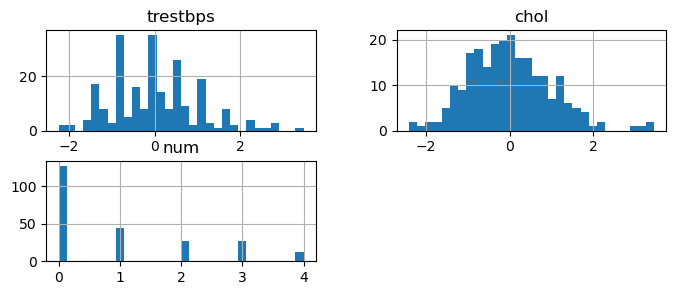

In [7]:
train_scaled[['trestbps', 'chol', 'num']].hist(bins=30, figsize=(8, 3))

In [8]:
plot_df = train_scaled

plot_df["presence"] = plot_df["num"].replace({
     0:"N",
     1:"Y",
     2:"Y",
     3:"Y",
     4:"Y",
})

heart_disease_chart = alt.Chart(plot_df, title='The relationshp of Serum Cholesterol and Resting Blood Pressure toward Heart disease').mark_point().encode(
    x=alt.X('trestbps', title='Resting Blood Pressure on Admission to Hospital (Standarized)', scale=alt.Scale(zero=False)),
    y=alt.Y('chol', title="Serum Cholesterol (Standardized)", scale=alt.Scale(zero=False)),
    color=alt.Color("presence", title = "presence of heart disease")
)

heart_disease_chart

alt.Chart(...)

## Methods
The presence of CAD is characterized by over 50% of heart vessels narrowing, while less than 50% of heart vessels narrowing indicates the absence of CAD. For our question in determining the presence or absence of CAD, we will use two variables for ease in 2D visualization and k-nearest neighbor calculations. 
The resting systolic blood pressure of patients and their serum cholesterol levels, will be used to classify the presence or absence of coronary artery disease (CAD). These two variables are important due to the nature of cholesterol in plaques, and how blood pressure is correlated with narrowing of blood vessels. Resting systolic blood pressure and serum cholesterol levels are integral variables within the database, and can be categorized based on healthy or abnormal values as described in Rahman et. al (2022). Resting systolic blood pressure under 120mmHg is considered typical while values over 120mmHg is considered high and abnormal. Healthy serum cholesterol levels normally under 200mg/dL, while values over 200mg/dL are considered abnormally high.

We can visualize our results through two different histograms for female and male respectively to understand how blood pressure and cholesterol serum levels can correlate to diagnosis of CAD. 

## Expected outcomes and significance
We would expect both female and male patients who report high cholesterol levels and high resting systolic blood pressure to be diagnosed with a heart disease such as CAD. And that we would not find any difference between the positive correlations and the diagnosis of CAD, in terms of sex. If our findings are consistent with our expected outcomes, this can provide strong evidence of a positive correlation between blood pressure and cholesterol serums, despite the sex of the patient. In addition, the positive correlation between these two variables could represent reliable biomarkers for the presence of CAD. This could prompt further exploration into the relationships between potential biomarkers for early detection of heart disease and how sex can be related in these relationships. Finding biomarkers to identify heart disease is a crucial step in prevention and treatment for patients.

## References
References
Coronary artery disease - Symptoms and causes. (2022, May 25). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9
Rahman, A. U., Saeed, M., Mohammed, M. A., Krishnamoorthy, S., Kadry, S., & Eid, F. (2022). An integrated algorithmic MADM approach for heart diseases’ diagnosis based on Neutrosophic Hypersoft set with possibility degree-based setting. Life, 12(5), 729. https://doi.org/10.3390/life12050729References
Coronary artery disease - Symptoms and causes. (2022, May 25). Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9
Rahman, A. U., Saeed, M., Mohammed, M. A., Krishnamoorthy, S., Kadry, S., & Eid, F. (2022). An integrated algorithmic MADM approach for heart diseases’ diagnosis based on Neutrosophic Hypersoft set with possibility degree-based setting. Life, 12(5), 729. https://doi.org/10.3390/life12050729